In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from IPython.html.widgets import interact
from scipy.interpolate import griddata

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [84]:
"""Initialize"""
i = 0
w = [0]
w_labels = [0]
# while i < 10:
#     w[i] = np.ones((8,8))
#     w[i] = np.matrix(w[i])
#     w[i] = w[i]/np.matrix.sum(w[i])
#     i = i + 1
w[0] = [[ 0.00334547,  0.00334547,  0.01097153,  0.03222196,  0.03193905,
          0.01620387,  0.00377666,  0.00334547],
        [ 0.00334547,  0.00405356,  0.02532799,  0.03907802,  0.03221521,
          0.02746106,  0.00747277,  0.00334547],
        [ 0.00334547,  0.0090629 ,  0.03924053,  0.0274577 ,  0.01194078,
          0.02944431,  0.01114613,  0.00334547],
        [ 0.00334547,  0.0119045 ,  0.0364323 ,  0.01658999,  0.00333863,
          0.02830166,  0.01750053,  0.00334547],
        [ 0.00334547,  0.01599265,  0.03233643,  0.00794424,  0.00435772,
          0.03050475,  0.01526149,  0.00334547],
        [ 0.00334547,  0.01061631,  0.03160636,  0.01775214,  0.01772805,
          0.0346209 ,  0.01336351,  0.00334547],
        [ 0.00334547,  0.00402756,  0.02751747,  0.0317268 ,  0.03272543,
          0.03308153,  0.00801715,  0.00334547],
        [ 0.00334547,  0.00347006,  0.01151108,  0.03070545,  0.03371705,
          0.01739717,  0.00406415,  0.00334547]]

In [85]:
def check_number(n,w,error,j):
    
    p = digits.target[n]
    x = np.matrix(digits.images[n])
    x = x/np.matrix.sum(x)
    
    d = 1000
    u = -1
    
    for i in w:
        u = u + 1
        z = np.absolute(x - i)
        c = np.matrix.sum(z)
        if c < d:
            d = c
            t = u
      
    if d < (1.5/(j)):
        #w[t] = w[t] + (x/10)
        #w[t] = w[t]/np.matrix.sum(w[t])
        #print('image', p, 'guess', w_labels[t])
        if p != w_labels[t]:
            error = error + 1
        
    elif d > (1.5/(j)):
        w.append(0)
        w_labels.append(0)
        w[t + 1] = x
        w_labels[t + 1] = p
        
    return [w,error,j]

In [86]:
j = 1.5

In [95]:
#plt.matshow(y, cmap=cm.gray)

percent_error = 0
check_number1 = []

h = -1

j = j + .1
h = h + 1
n = 300
ni = n
error = 0

while n < 1000:
    check_number1 = check_number(n,w,error,j)
    j = check_number1[2]
    error = check_number1[1]
    w = check_number1[0]
    n = n + 1
percent_error = -100*(((n-ni)-(error))/(ni-n))
print (error, '/', n-ni, '->', percent_error, '% correct')
print(len(w))

# j = -1
# for i in w:
#     j = j + 1
#     plt.matshow(w[j], cmap=cm.gray)
print(len(w))
print(j)

167 / 700 -> 76.14285714285714 % correct
161
161
2.400000000000001


In [59]:
j = -1
for i in w:
    j = j + 1
    #Find the most similar and least useful arrays and throw them out/combine them  w[j]

In [96]:
n = 1000
ni = n
error = 0
weight = np.ones((8,8))

while n < 1700:
    check_number1 = check_number(n,w,error,j)
    j = check_number1[2]
    error = check_number1[1]
    w = check_number1[0]
    n = n + 1
        
percent_error = -100*(((n-ni)-(error))/(ni-n))
print (error, '/', n-ni, '->', percent_error, '% correct')

109 / 700 -> 84.42857142857143 % correct


In [16]:
def check_guess(r):
    check_number(r,w,error)
    plt.matshow(digits.images[r], cmap=cm.gray)
    print("The right answer is", digits.target[r])

The right answer is 9


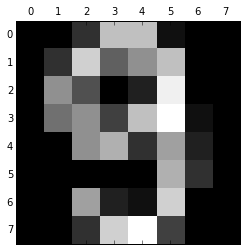

In [17]:
check_guess(1326)